<a href="https://colab.research.google.com/github/Dabin-Park/EDA/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EDA 타이타닉

import pandas as pd
import numpy as np

import seaborn as sns   # 데이터 분포 시각화
import matplotlib.pyplot as plt

In [ ]:
'''
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 (특정 카테고리에 속할지를 0과 1 사이의 연속적인 확률로 예측하는 회귀 알고리즘)
from sklearn.svm import SVC, Linear SVC # 분류에 사용되는 지도학습 모델 
                                        # support vector를 사용해서 결정 경계(Decision Boundary)를 정의
                                        # 분류되지 않은 점을 해당 결정 경계와 비교해서 분류 
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 분류 ()
from sklearn.neighbors import KNeighborsClassifier  # K-최근접 이웃을 활용한 분류
from sklearn.naive_bayes import GaussianNB  # naive_bayes : 통계수학에 기반한 머신러닝 알고리즘
                                            # 이진 속성을 가지고 속성이 많은 경우 : BernoulliNB
                                            # 이진 속성이 아닌 일반적인 연속값 속성을 가지는 경우 : GaussianNB 
 
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier  # 확률적 경사하강법 (Stochastic Gradient Descent)
from sklearn.tree import DecisionTreeClassifier # 결정트리 : 
'''
import warnings 
warnings.filterwarnings(action = 'ignore')  # 경고 메시지 무시 

In [ ]:
# 데이터 셋 불러오기
path = '/content/drive/MyDrive/Dataset/'
train_df = pd.read_csv(path+'train.csv')
test_df = pd.read_csv(path+'test.csv') 

In [ ]:
 # 데이터 변수 확인
print(train_df.columns.values)  
    # 'Survived' : 생존 여부(종속 변수) (0 = 사망 , 1 = 생존)
    # 'Pclass' : 객실 등급(승객의 사회적, 경제적 지위) (1st : Upper, 2nd : Middle, 3rd : Lower)
    # 'Sex' : 성별 
    # 'Age' : 나이
    # 'SibSp' : 동반한 Sibling(형재 자매)와 Spouse(배우자)의수 
    # 'Parch' : 동반한 Parent(부모) Child(자식)의 수
    # 'Cabin' : 객실의 번호 
    # 'Embarked' : 승선한 항


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()   # 'Survived' 행이 존재 X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# 훈련 자료 정보 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 테스트 자료 정보 
test_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# 훈련 자료 int, float 변수 통계치
train_df.describe() # 누락데이터(NaN)는 제외되고 데이터 요약

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 훈련 자료 object 변수 통계치 
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


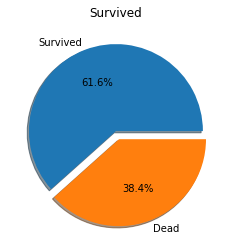

In [ ]:
labels = ['Survived', 'Dead']
train_df['Survived'].value_counts().plot.pie(labels = labels, explode = [0,0.1], autopct = '%1.1f%%', shadow = True)
plt.title('Survived')
plt.ylabel('')
plt.show()

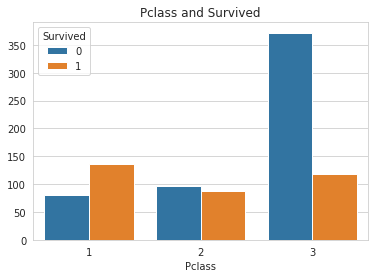

In [ ]:
# relation of Pclass and Survived   # 객실 등급이 높을수록 생존 비율이 높다. 
sns.set_style('whitegrid')
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Pclass and Survived')
plt.ylabel('')
plt.show()

In [ ]:
# relation of name and Survived

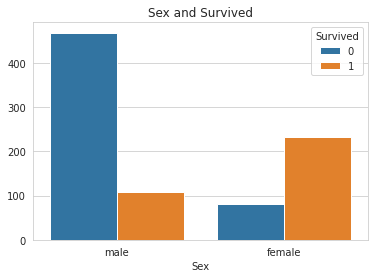

In [ ]:
# relation of Sex and Survived  # 남성보다 여성의 생존 비율이 높다.
sns.set_style('whitegrid')
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Sex and Survived')
plt.ylabel('')
plt.show()

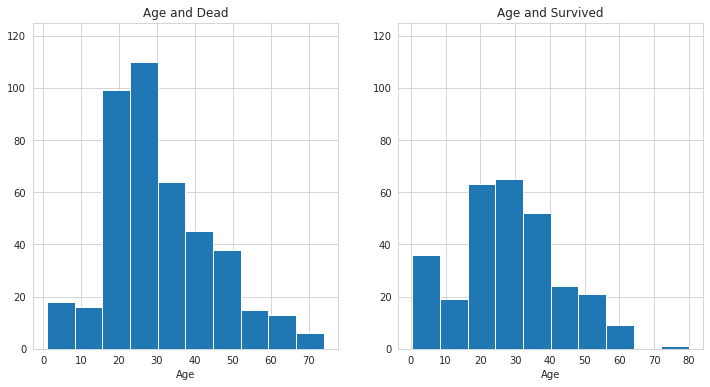

In [ ]:
figure = plt.figure(figsize=(12,6))
cols, rows = 2,1

# relation of Age and Survived  # 아기들의 생존 비율이 높다.
figure.add_subplot(rows, cols, 1)
train_df[train_df['Survived']==0].Age.plot.hist(bins=10)
plt.title('Age and Dead')
plt.xlabel('Age')
plt.ylabel('')
plt.ylim([0, 125])

figure.add_subplot(rows, cols, 2)
train_df[train_df['Survived']==1].Age.plot.hist(bins=10)
plt.title('Age and Survived')
plt.xlabel('Age')
plt.ylabel('')
plt.ylim([0, 125])

plt.show()

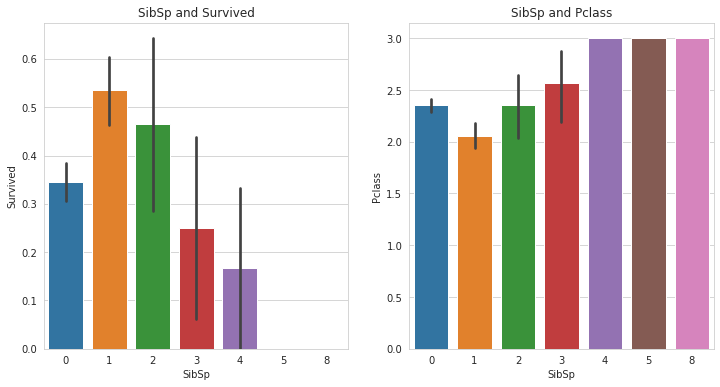

In [ ]:
figure = plt.figure(figsize=(12,6))
cols, rows = 2,1

# relation of SibSp and Survived    # 의외로 혼자 탄손님의 생존 비율이 낮고, 5명 이상 함께 탄 손님들은 모두 사망 하였다(여러명이 함께 타면 한명쯤은 생존할거 같은데...)
figure.add_subplot(rows, cols, 1)
sns.barplot('SibSp','Survived',data=train_df) 
plt.title('SibSp and Survived')
plt.ylabel('Survived')

# relation of SibSp and Pclass  # 이유 : 5명 이상 함께 탄 손님은 전부 3등급 객실 이용 
figure.add_subplot(rows, cols, 2)
sns.barplot('SibSp','Pclass',data=train_df)  
plt.title('SibSp and Pclass')
plt.ylabel('Pclass')

plt.show()

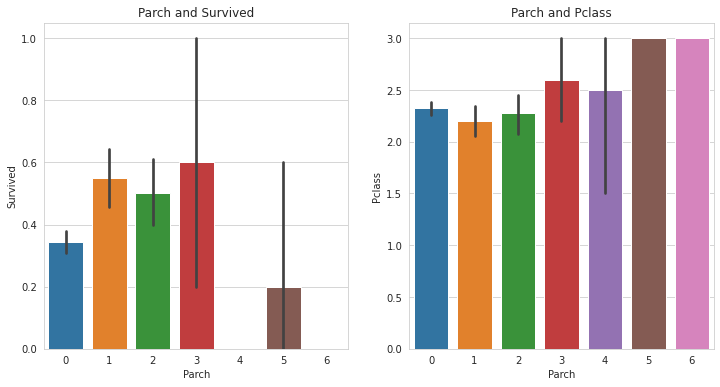

In [ ]:
figure = plt.figure(figsize=(12,6))
cols, rows = 2,1

# relation of Parch and Survived    # SibSp와 결과가 비슷 
figure.add_subplot(rows, cols, 1)
sns.barplot('Parch','Survived',data=train_df) 
plt.title('Parch and Survived')
plt.ylabel('Survived')

# relation of Parch and Pclass
figure.add_subplot(rows, cols, 2)
sns.barplot('Parch','Pclass',data=train_df)  
plt.title('Parch and Pclass')
plt.ylabel('Pclass')

plt.show()

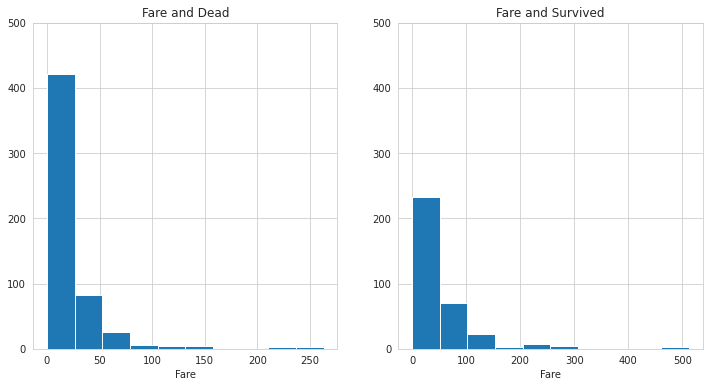

In [ ]:
figure = plt.figure(figsize=(12,6))
cols, rows = 2,1

# relation of Fare and Survived # 가격 저렴한 3등급 객실 손님이 많아 눈으로 비율을 비교하기 힘들다 해결방법은 모르겠다.
figure.add_subplot(rows, cols, 1)
train_df[train_df['Survived']==0].Fare.plot.hist(bins=10)
plt.title('Fare and Dead')
plt.xlabel('Fare')
plt.ylabel('')
plt.ylim([0, 500])

figure.add_subplot(rows, cols, 2)
train_df[train_df['Survived']==1].Fare.plot.hist(bins=10)
plt.title('Fare and Survived')
plt.xlabel('Fare')
plt.ylabel('')
plt.ylim([0, 500])

plt.show()

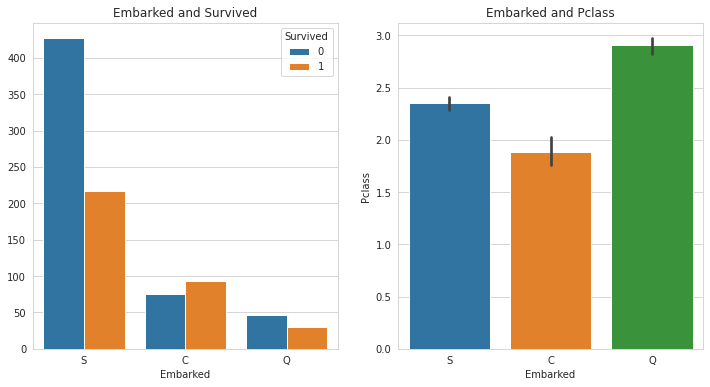

In [ ]:
figure = plt.figure(figsize=(12,6))
cols, rows = 2,1

# relation of Embarked and Survived # C 항구에서 승선한 손님들의 생존 확률이 높다  
figure.add_subplot(rows, cols, 1)
sns.set_style('whitegrid')
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title('Embarked and Survived')
plt.ylabel('')

# relation of Embarked and Pclass   # C 항구의 객실 등급 평균이 낮다(좋은 객실에 탔다).
figure.add_subplot(rows, cols, 2)
sns.barplot('Embarked','Pclass',data=train_df)  
plt.title('Embarked and Pclass')
plt.ylabel('Pclass')

plt.show()